In [1]:
#Import libraries
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
#from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [2]:
# Applying Transforms to the Data
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [3]:
dir="C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data"
dir

'C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data'

In [4]:
# Load the Data

# Set train and valid directory paths

dataset = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data"

train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')

# Batch size
bs = 32

# Number of classes
num_classes = len(os.listdir(valid_directory))  
print(num_classes)

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid'])
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)

5
{0: 'Aphids', 1: 'Bacterial blight', 2: 'Cotton Boll Rot', 3: 'Healthy', 4: 'Powdery mildew'}


In [5]:
train_data_size, valid_data_size

(4160, 167)

In [6]:
alexnet = models.alexnet(pretrained=True)
alexnet

C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
# Freeze model parameters
for param in alexnet.parameters():
    param.requires_grad = False

In [8]:
# Change the final layer of AlexNet Model for Transfer Learning
alexnet.classifier[6] = nn.Linear(4096, num_classes)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
# Define Optimizer and Loss Function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [10]:
def train_and_validate(model, loss_criterion, optimizer, epochs=50):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        #torch.save(model, dataset+'_model_'+str(epoch)+'.pt')
            
    return model, history

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 50
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)

torch.save(history, dataset+'_history_50.pt')

Epoch: 1/50
Epoch : 001, Training: Loss: 0.2434, Accuracy: 91.3942%, 
		Validation : Loss : 0.0927, Accuracy: 97.0060%, Time: 153.2221s
Epoch: 2/50
Epoch : 002, Training: Loss: 0.0939, Accuracy: 96.7067%, 
		Validation : Loss : 0.0741, Accuracy: 97.6048%, Time: 77.1936s
Epoch: 3/50
Epoch : 003, Training: Loss: 0.0697, Accuracy: 97.9567%, 
		Validation : Loss : 0.0651, Accuracy: 97.6048%, Time: 76.9805s
Epoch: 4/50
Epoch : 004, Training: Loss: 0.0487, Accuracy: 98.5817%, 
		Validation : Loss : 0.1049, Accuracy: 97.6048%, Time: 77.7383s
Epoch: 5/50
Epoch : 005, Training: Loss: 0.0444, Accuracy: 98.4135%, 
		Validation : Loss : 0.0737, Accuracy: 98.2036%, Time: 77.7228s
Epoch: 6/50
Epoch : 006, Training: Loss: 0.0510, Accuracy: 98.2692%, 
		Validation : Loss : 0.0873, Accuracy: 98.2036%, Time: 77.9967s
Epoch: 7/50
Epoch : 007, Training: Loss: 0.0407, Accuracy: 98.6538%, 
		Validation : Loss : 0.0859, Accuracy: 97.6048%, Time: 78.9369s
Epoch: 8/50
Epoch : 008, Training: Loss: 0.0395, Accur

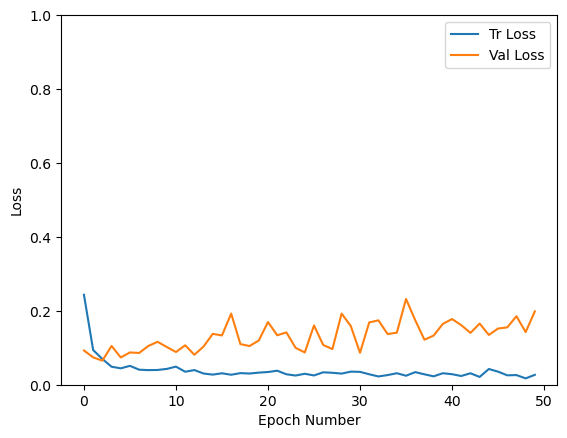

In [13]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

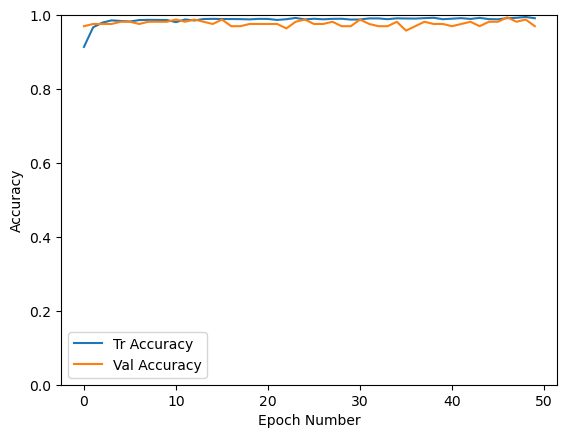

In [14]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [15]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(5, dim=1)
        for i in range(5):
            print("Predcition", i+1, ":", idx_to_class[topclass.numpy()[0][i]], ", Score: ", topk.numpy()[0][i])

Predcition 1 : Aphids , Score:  1.0
Predcition 2 : Cotton Boll Rot , Score:  1.7144106e-09
Predcition 3 : Bacterial blight , Score:  1.7844935e-10
Predcition 4 : Powdery mildew , Score:  4.101801e-12
Predcition 5 : Healthy , Score:  5.52055e-14


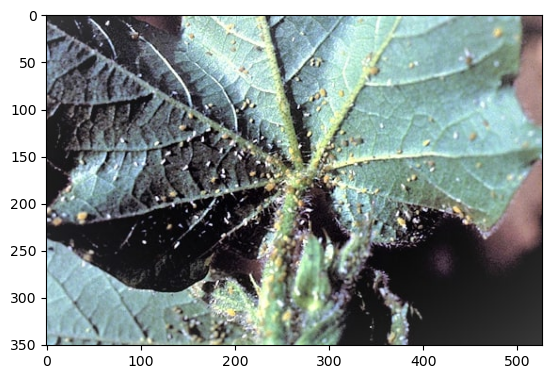

In [16]:
predict(trained_model, "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\valid\\Aphids\\6.jpg")

Predcition 1 : Cotton Boll Rot , Score:  1.0
Predcition 2 : Powdery mildew , Score:  3.4512307e-16
Predcition 3 : Bacterial blight , Score:  3.0400112e-17
Predcition 4 : Aphids , Score:  6.3656434e-20
Predcition 5 : Healthy , Score:  5.210734e-26


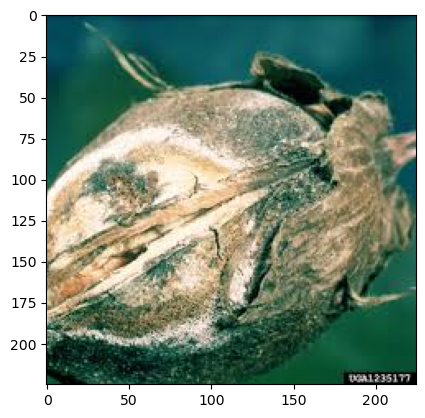

In [17]:
predict(trained_model, "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\valid\\Cotton Boll Rot\\66.jpg")

Predcition 1 : Bacterial blight , Score:  1.0
Predcition 2 : Aphids , Score:  4.396679e-09
Predcition 3 : Powdery mildew , Score:  4.1967864e-14
Predcition 4 : Cotton Boll Rot , Score:  5.1865664e-16
Predcition 5 : Healthy , Score:  3.38696e-22


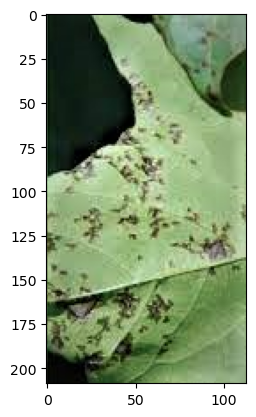

In [18]:
predict(trained_model, "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\valid\\Bacterial blight\\5.jpg")

Predcition 1 : Powdery mildew , Score:  1.0
Predcition 2 : Aphids , Score:  2.9288657e-08
Predcition 3 : Bacterial blight , Score:  2.2026287e-12
Predcition 4 : Healthy , Score:  2.1282978e-13
Predcition 5 : Cotton Boll Rot , Score:  1.3000825e-16


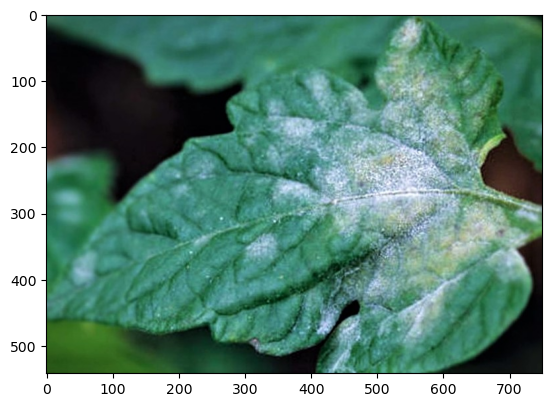

In [19]:
predict(trained_model, "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\valid\\Powdery mildew\\6.jpg")

Predcition 1 : Healthy , Score:  1.0
Predcition 2 : Aphids , Score:  2.8117459e-08
Predcition 3 : Bacterial blight , Score:  5.3300944e-14
Predcition 4 : Powdery mildew , Score:  2.2208918e-15
Predcition 5 : Cotton Boll Rot , Score:  2.2299487e-16


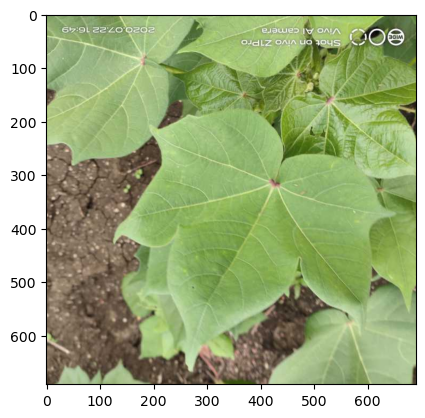

In [20]:
predict(trained_model, "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\test\\Healthy\\29.jpg")